# Machine Learning: Session 1

### How to solve the tasks?

#### Please no deletion of cells, only adding solutions

Please do not delete any of the cells that have been given to you in the notebook. If you accidentally do so, please add the deleted content back (`Edit -> Undo Deleted Cell` might help). Please only edit the cells where you need to insert your solutions. It is fine to have your solution consisting of many cells, so feel free to add cells if needed. Please make sure that the solution to each subtask is in the dedicated slot, e.g. it is not sufficient to just state that you already answered this question in the previous subtask.

These formatting requests are to make our grading simpler. We are using automatic tools to rearrange solutions, e.g. collecting solutions of the same subtask by all students into a single notebook for faster manual grading. If you delete some cells of task description then you risk losing points, although we try to notice and grade manually all such cases.

#### No need for code comments (unless stated otherwise)


#### Before sending your notebook

Please make sure that you do `Kernel -> Restart and Run All` on your Jupyter notebook before submission. This is something that we will do anyways before starting to grade, and by doing it yourself you can ensure that everything works as intended. Please make sure that your code does not throw errors half way through, because then whatever comes after that in the notebook would not be run. If you are not able to fully solve some coding task then at least please leave it at a state where it does not throw errors, commenting out some lines if necessary.

#### Submit only .ipynb file

Please submit only the .ipynb Jupyter notebook file, unless stated otherwise. We will run the notebook with all the required files (e.g. csv files with data) in the same folder.


### <font color='purple'>Please make sure that you have all the following packages installed: </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

C:\Users\ibrahim.mohamed\AppData\Local\Temp\ipykernel_17428\694074649.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


In [2]:
from numpy.random import multivariate_normal, seed
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Task 1. Basic linear classifier

#### <font color='purple'>(a) Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and define a `pandas` dataframe using the arrays given below. Please store your dataframe in the variable `data`. It should contain 3 columns and 12 rows. 

In [3]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

##### YOUR CODE STARTS ##### (please do not delete this line)
data = pd.DataFrame({"x1": x1, "x2":x2, 'y':y})
##### YOUR CODE ENDS ##### (please do not delete this line)

if data is not ...:
    display(data.head()) # this will show the first lines of the dataframe, helping us to check whether you got it right    
else:
    print(CRED + "TODO: Assign data!" + CEND)

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1


#### <font color='purple'>(b) Plot your data in axes `x1` and `x2`, highlight two classes with different colors, name the axes.

Feel free to use techniques from the notebook of the first practice session

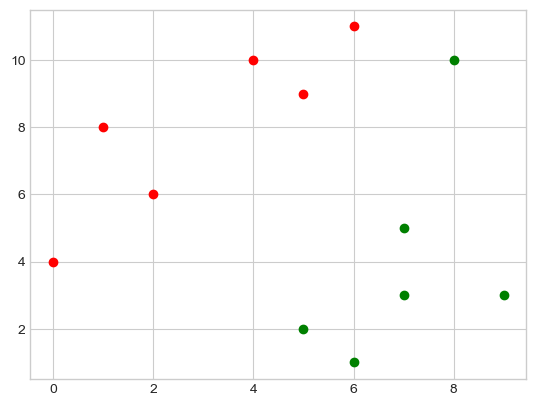

In [4]:
def plot_data(data):
    # Plot function goes here
    # We suggest to use plt.plot(...) for each class
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    import matplotlib.pyplot as plt 
    plt.plot(data[data['y']==1]['x1'], data[data['y']==1]['x2'], 'go', label='class 1')
    plt.plot(data[data['y']==-1]['x1'], data[data['y']==-1]['x2'], 'ro',label='class 2')
    # raise NotImplementedError("Implement the function to plot the data!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
try:
    plot_data(data)
    plt.show()
except NotImplementedError as e:
    print(CRED + "TODO: " + str(e) + CEND)

#### <font color='purple'>(c) Find and highlight in the plot the center of mass for each of two classes as well as the middle point between these centers. </font>

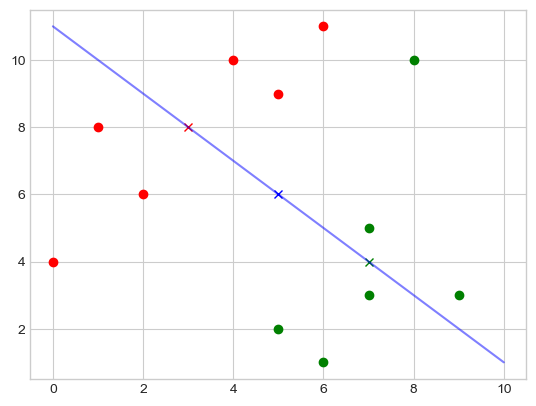

Center of mass for class +1: (7.000000,4.000000)
Center of mass for class -1: (3.000000,8.000000)
Middle point between the two centers: (5.000000,6.000000)


In [5]:
# Calculate values for pos_c1, pos_c1, neg_c1, neg_c2, m1, m2 which will all be printed below
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Assign values to pos_c1, pos_c2, neg_c1, neg_c2, m1, and m2")
    pos = data[data['y']==1]
    neg = data[data['y']==-1]
    
    pos_c1 = np.mean(pos['x1'])
    pos_c2 = np.mean(pos['x2'])
    neg_c1 = np.mean(neg['x1'])
    neg_c2 = np.mean(neg['x2'])
    
    m1 = (pos_c1 + neg_c1) / 2
    m2 = (pos_c2 + neg_c2) / 2
    
    # Plot the three points
    plot_data(data)
    plt.plot(pos_c1, pos_c2, 'gx', label='class 1 ')
    plt.plot(neg_c1, neg_c2, 'rx', label='class 2 middle point')
    plt.plot(m1, m2, 'bx', label='middle point')
    
    x = np.linspace(0, 10, 100)
    plt.plot(x, -x + 11, 'b-', alpha=0.5)
    plt.show()
    ##### YOUR CODE ENDS ##### (please do not delete this line)

    print("Center of mass for class +1: (%f,%f)" % (pos_c1,pos_c2))
    print("Center of mass for class -1: (%f,%f)" % (neg_c1,neg_c2))
    print("Middle point between the two centers: (%f,%f)" % (m1,m2))
except NotImplementedError as e:
    print(CRED + "TODO: " + str(e) + CEND)

#### <font color='purple'>(d) Find (or guess) the equation of the decision boundary line chosen by the basic linear classifier. Please express the equation in the format $x_2=a\cdot x_1+b$. Note that we expect to some short explanation as well, not only the final equation.</font>

<font color='purple'>HINT: For this you might need to use the positions of centers of mass and the middle point between them. Formula of a line through two points $(x'_1,x'_2)$ and $(x''_1,x''_2)$ can help also:</font>

$\frac{x_1-x'_1}{x''_1-x'_1} = \frac{x_2-x'_2}{x''_2-x'_2}$

Answer: the best line is the one that goes through the middle point between the centers of mass of the two classes. and perpendicular to the line connecting the centers of mass of the two classes. 

since, the equation of the line connecting the centers of mass of the two classes is: $x_2 = -x_1 + 11$

The equation of the line perpendicular to it is and the decision boundary: $x_2 = x_1 + 1$

#### <font color='purple'>(e) Plot the data together with the decision boundary line chosen by the basic linear classifier. For this you can make use of the equation that you obtained in the previous subtask.</font>

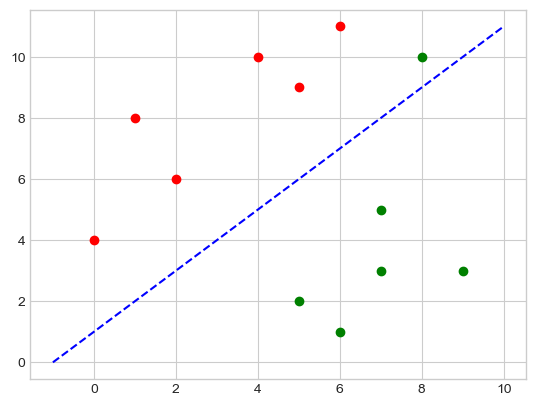

In [6]:
try:
    plot_data(data) # first plot the data points

    # Write code to draw the line. Hint: you can use plt.plot(...) again 
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    
    x = np.linspace(-1, 10, 100)
    y = x + 1
    
    plt.plot(x, y, 'b--')
    # raise NotImplementedError("Plot the decision boundary!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)

    plt.show()
except NotImplementedError as e:
    print(CRED + "TODO: " + str(e) + CEND)

#### <font color='purple'>(f) Are there any misclassified instances? If yes, then please write their coordinates.</font>

Yes, $(8, 10)$

#### <font color='purple'>(g) Are the classes linearly separable in the training data? If yes, then please report one line which separates the classes, by writing down its equation.</font>

Yes, $x_2 = x_1 + 3$


#### <font color='purple'>(h) Did you get help in this task from public external code (yes/no). If yes, then please provide the link also.</font>

NO

## Task 2. Perceptron

#### <font color='purple'>(a) Implement the perceptron algorithm based on pseudocode from the first lecture: </font>

<img src="perceptron_algorithm.png" alt="perceptron_algorithm" style="width: 400px;"/>

<font color='purple'>**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html), it could be useful, you may want to refresh your memories about the [dot product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) as well. Your final plot should be a picture similar to this:
<img src="perceptron_result.png" alt="perceptron_result" style="width: 300px;"/></font>

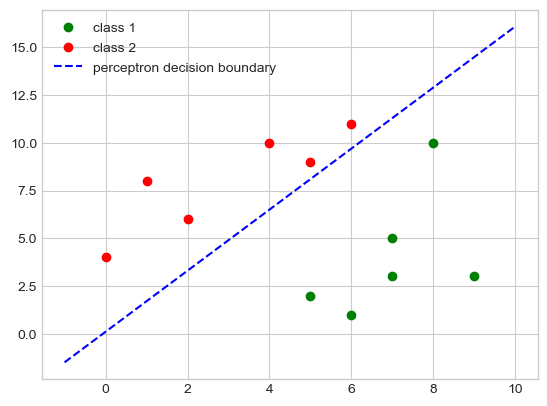

In [7]:
def perceptron(data, w=[0,0,0], learning_rate=1):
    # Write the code to train the perceptron, putting the final weights in variable `w` 
    # Optional challenge: Can you do it with less than 10 lines of code? (no extra points for this)
    ##### YOUR PERCEPTRON CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement perceptron.")
    converged = False
    while not converged:
        converged = True
        for i in range(len(data)):
            x = data.iloc[i, :-1]
            y = data.iloc[i, -1]
            if y * w @ x <= 0:
                w += learning_rate * y * x
                converged = False
    return w

    ##### YOUR PERCEPTRON CODE ENDS ##### (please do not delete this line)

try:
    if data is ...:
        raise NotImplementedError("You need to assign a value to variable \"data\"!")
    data['x0'] = np.ones(len(data)) # Don't forget to create homogeneous coordinates!
    data = data[['x0', 'x1', 'x2', 'y']]  # Make column reordering
    w = perceptron(data)
    plot_data(data)
    
    # Finally plot the resulting decision boundary line
    ##### YOUR PLOTTING CODE STARTS ##### (please do not delete this line)
    x = np.linspace(-1, 10, 100)
    y = -w[1]/w[2] * x - w[0]/w[2]
    
    plt.plot(x, y, 'b--', label='perceptron decision boundary')
    plt.legend()
    # raise NotImplementedError("Plot the decision boundary.")
    ##### YOUR PLOTTING CODE ENDS ##### (please do not delete this line)
    
    plt.show()
except NotImplementedError as e:
    print(CRED + "TODO: " + str(e) + CEND)

#### <font color='purple'>(b) Did you get help from public external code (yes/no). If yes, then please provide the link also.</font>

NO

## Task2: Dual perceptron
#### <font color='purple'> Implement the dual perceptron algorithm. </font>
<img src="dual_perceptron.png" alt="Dual perceptron" style="width: 500px;"/>

**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html), it could be useful

In [8]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
data['x0'] = np.ones_like(data['x1']) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]
data.head()

,x0,x1,x2,y
0,1,5,2,1
1,1,6,1,1
2,1,7,3,1
3,1,7,5,1
4,1,8,10,1


In [9]:
def dual_perceptron(data):
    ##### YOUR CODE STARTS #####(please do not delete this line)
    # raise NotImplementedError("Compare different methods")
    converged = False
    alpha = np.zeros(data.shape[0]) 
    while not converged:
        converged = True
        for i in range(data.shape[0]):
            x = data.iloc[i, :-1]
            y = data.iloc[i, -1]
            if y * (alpha * data.iloc[:, -1] @ data.iloc[:, :-1]) @ x  <= 0:
                alpha[i] += 1
                converged = False
                
    w = alpha * data.iloc[:, -1] @ data.iloc[:, :-1] 
    return w
    ##### YOUR CODE ENDS #####(please do not delete this line)

##### Test your Solution

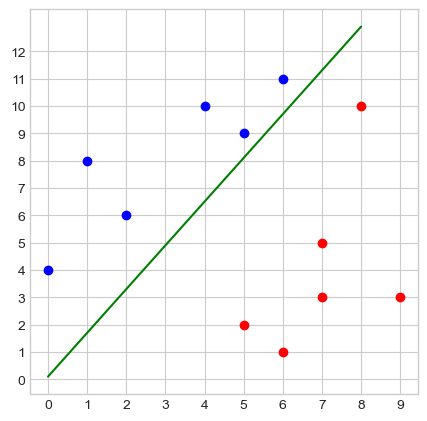

In [10]:
try:
    w = dual_perceptron(data)
    xs= np.linspace(0,8,100)
    ys = (-1) * (w[1] / w[2]) * xs - w[0] / w[2]

    fig = plt.figure(figsize=(5,5))
    plt.plot(x1[y<0], x2[y<0], 'bo')
    plt.plot(x1[y>0], x2[y>0], 'ro')
    plt.yticks(np.arange(13))
    plt.xticks(np.arange(13))
    plt.plot(xs, ys, color = "green")

    plt.show()
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>